In [1]:
import os
import itertools
from types import SimpleNamespace
import numpy
import matplotlib.pyplot as pyplot
from scipy.interpolate import make_interp_spline
from scipy import signal
import LocalModule

In [2]:
DsetDirs, FileTags = LocalModule.temp_stats_dict()
Results = dict()
for key in DsetDirs:
    Datasets = LocalModule.read_datasets(DsetDirs[key], FileTags[key])
    Results[key] = LocalModule.temporal_stats(Datasets)

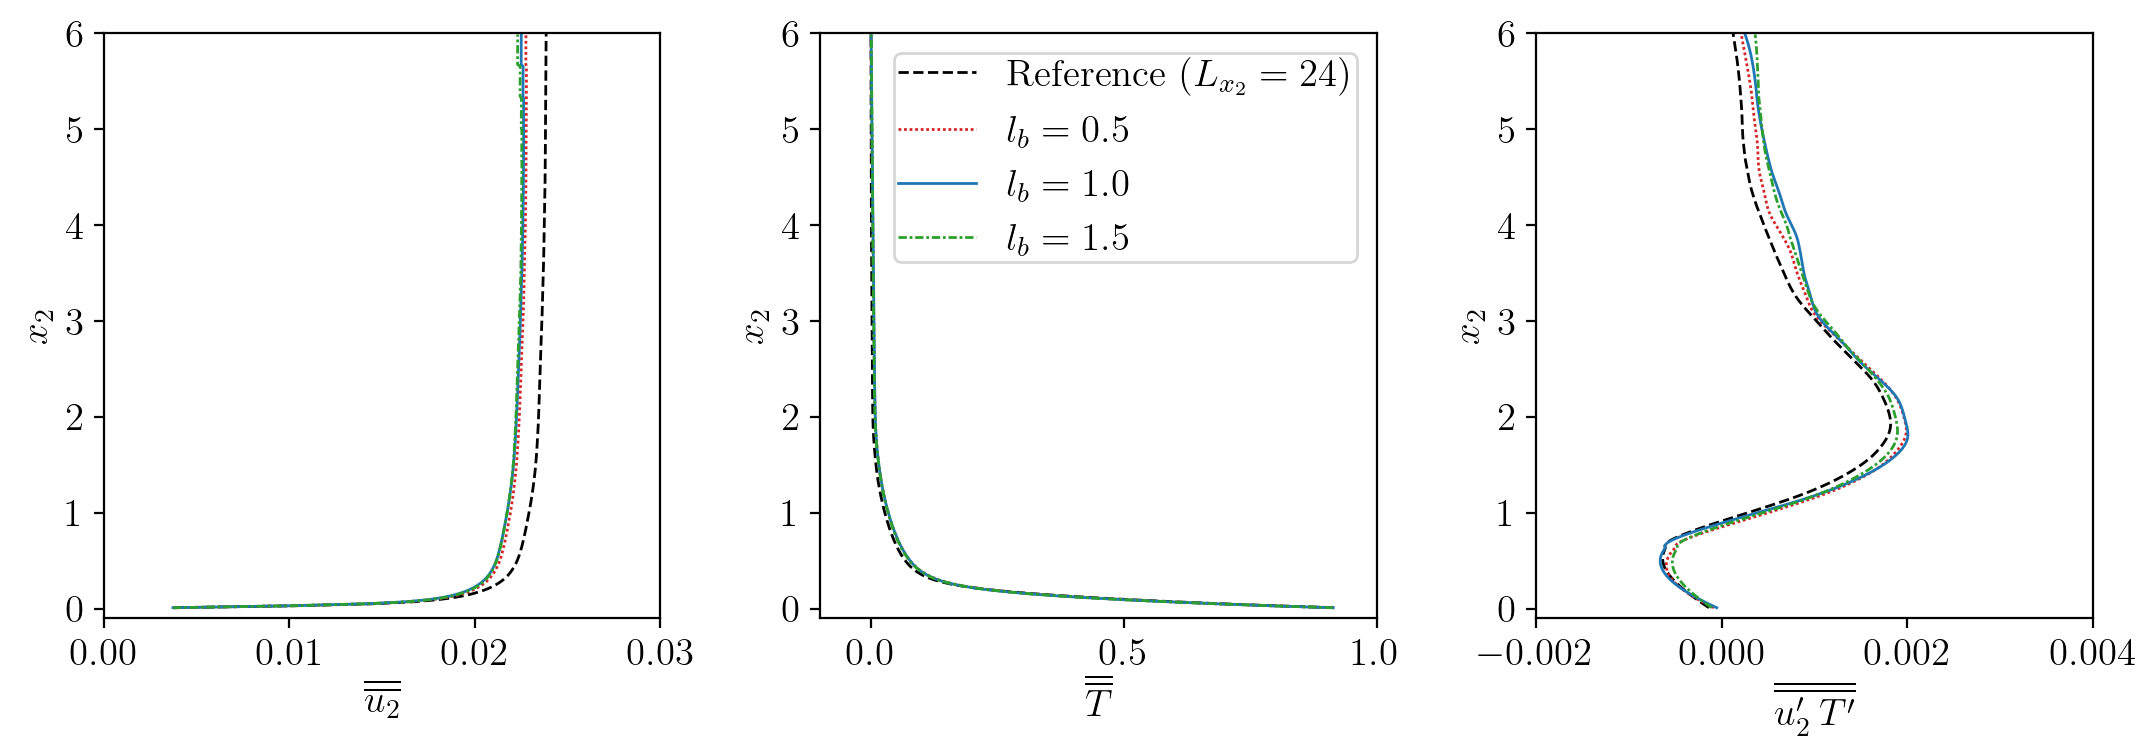

In [3]:
pyplot.rc("font", family="serif", size=14, weight="bold")
pyplot.rc("axes", labelweight="bold", titleweight="bold")
pyplot.rc("text", usetex=True)

VarIndex = ["vely_mean", "temp_mean", "turb_yflux"]
Figure, PlotList = pyplot.subplots(1, len(VarIndex), figsize=(11,4), dpi=200)

for Plot, Var in zip(PlotList, VarIndex):

    Linestyles = itertools.cycle(("--", (0, (1, 1)), "-", (0, (3, 1, 1, 1))))
    Colors = itertools.cycle(("black","tab:red","tab:blue","tab:green"))
    Linewidths = itertools.cycle((1.0,1.0,1.0,1.0))
    
    for key in Results:
        if Var == "turb_yflux":
            Plot.plot(signal.savgol_filter(numpy.mean(Results[key].blocklist[0][Var][:,1:-1,1:-1],axis=2)[0,:], 60, 3),
                      #numpy.mean(Results[key].blocklist[0][Var][:,1:-1,1:-1],axis=2)[0,:],
                      Results[key].blocklist[0].yrange("center")[1:-1], 
                      linewidth=next(Linewidths), linestyle=next(Linestyles), color=next(Colors))
        else:             
            Plot.plot(numpy.mean(Results[key].blocklist[0][Var][:,1:-1,1:-1],axis=2)[0,:],
                      Results[key].blocklist[0].yrange("center")[1:-1], 
                      linewidth=next(Linewidths), linestyle=next(Linestyles), color=next(Colors))

    if Var == "temp_mean":
        Plot.set_xlim([-0.1,1.])
        Plot.set_xlabel(r"$\overline{\overline{T}}$")
        Plot.legend([r"Reference ($L_{x_2}=24$)",f"$l_b=0.5$",f"$l_b=1.0$",f"$l_b=1.5$"], borderpad=0.1, ncol=1)
    elif Var == "vely_mean":
        Plot.set_xlim([0.,.03])
        Plot.set_xlabel(r"$\overline{\overline{u_2}}$")
    elif Var == "turb_yflux":
        Plot.set_xlim([-0.002, 0.004])
        Plot.set_xlabel(r"$\overline{\overline{u'_2\:T'}}$")
        
    Plot.set_ylim([-0.1,6])
    Plot.set_ylabel(r"$x_2$", rotation=90)

#pyplot.legend([r"Reference ($L_{x_2}=24$)",f"$l_b=0.5$",f"$l_b=1.0$",f"$l_b=1.5$"], borderpad=0.1, ncol=1)
pyplot.tight_layout()
pyplot.savefig("/Users/Akash/Desktop/first.png")
pyplot.show()

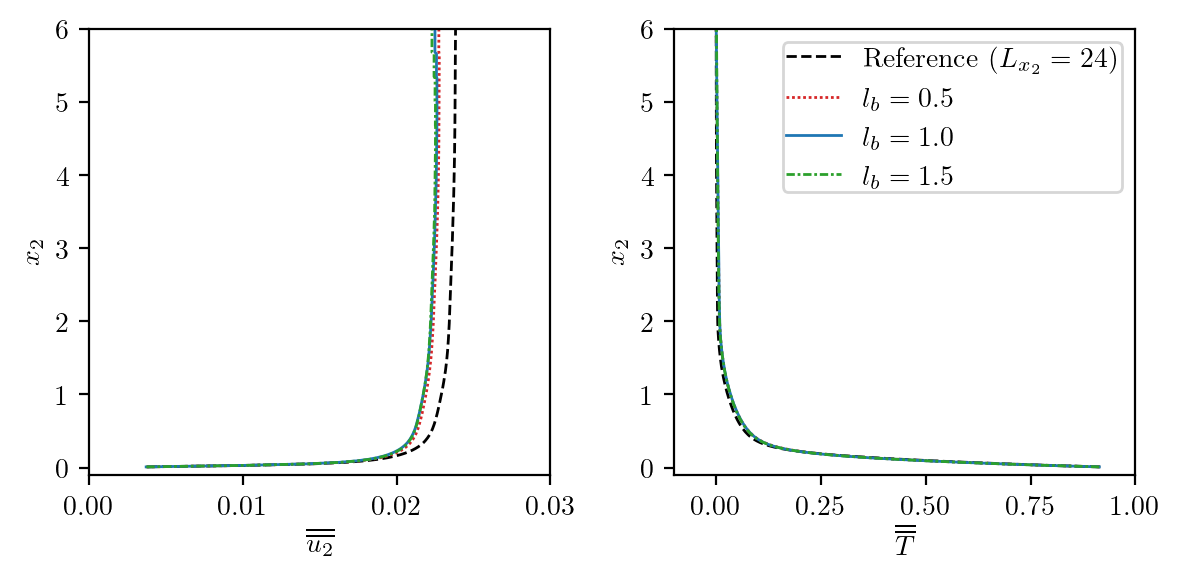

In [4]:
pyplot.rc("font", family="serif", size=10, weight="bold")
pyplot.rc("axes", labelweight="bold", titleweight="bold")
pyplot.rc("text", usetex=True)

VarIndex = ["vely_mean", "temp_mean"]
Figure, PlotList = pyplot.subplots(1, len(VarIndex), figsize=(6,3), dpi=200)

for Plot, Var in zip(PlotList, VarIndex):

    Linestyles = itertools.cycle(("--", (0, (1, 1)), "-", (0, (3, 1, 1, 1))))
    Colors = itertools.cycle(("black","tab:red","tab:blue","tab:green"))
    Linewidths = itertools.cycle((1.0,1.0,1.0,1.0))
    
    for key in Results:            
        Plot.plot(numpy.mean(Results[key].blocklist[0][Var][:,1:-1,1:-1],axis=2)[0,:],
                  Results[key].blocklist[0].yrange("center")[1:-1],
                  linewidth=next(Linewidths), linestyle=next(Linestyles), color=next(Colors))

    if Var == "temp_mean":
        Plot.set_xlim([-0.1,1.])
        Plot.set_xlabel(r"$\overline{\overline{T}}$")
        Plot.legend([r"Reference ($L_{x_2}=24$)",f"$l_b=0.5$",f"$l_b=1.0$",f"$l_b=1.5$"], borderpad=0.1, ncol=1)
    elif Var == "vely_mean":
        Plot.set_xlim([0.,.03])
        Plot.set_xlabel(r"$\overline{\overline{u_2}}$")
        
    Plot.set_ylim([-0.1,6])
    Plot.set_ylabel(r"$x_2$", rotation=90)

#pyplot.legend([r"Reference ($L_{x_2}=24$)",f"$l_b=0.5$",f"$l_b=1.0$",f"$l_b=1.5$"], borderpad=0.1, ncol=1)
pyplot.tight_layout()
pyplot.show()

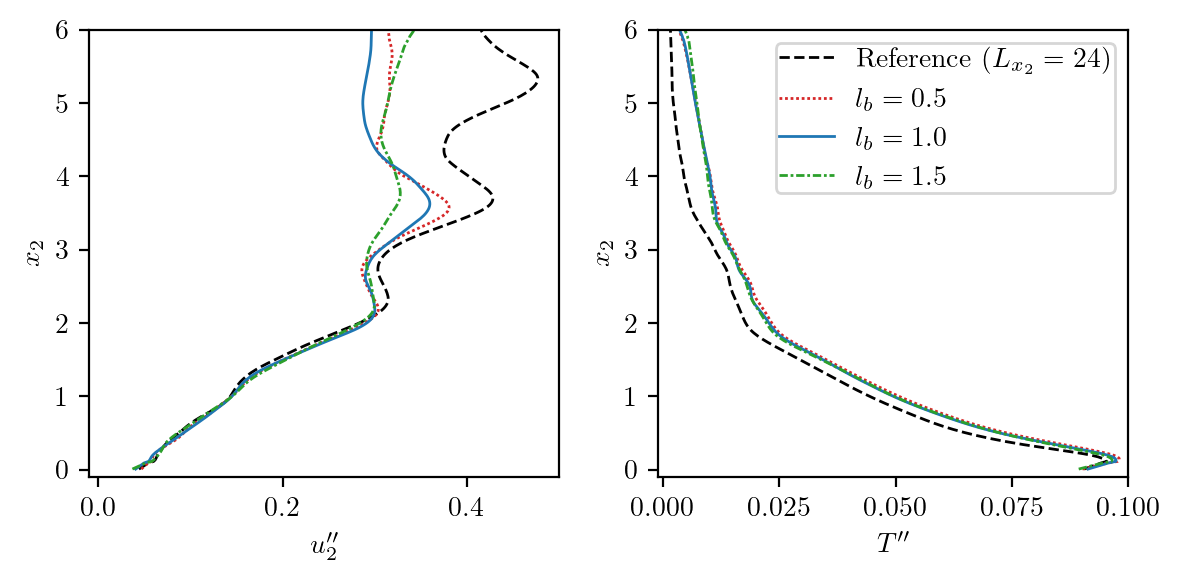

In [5]:
pyplot.rc("font", family="serif", size=10, weight="bold")
pyplot.rc("axes", labelweight="bold", titleweight="bold")
pyplot.rc("text", usetex=True)

VarIndex = ["vely_fluc", "temp_fluc"]
Figure, PlotList = pyplot.subplots(1, len(VarIndex), figsize=(6,3), dpi=200)

for Plot, Var in zip(PlotList, VarIndex):

    Linestyles = itertools.cycle(("--", (0, (1, 1)), "-", (0, (3, 1, 1, 1))))
    Colors = itertools.cycle(("black","tab:red","tab:blue","tab:green"))
    Linewidths = itertools.cycle((1.0,1.0,1.0,1.0))
    
    for key in Results:
        Plot.plot(signal.savgol_filter(numpy.sqrt(numpy.mean(Results[key].blocklist[0][Var][:,1:-1,1:-1],axis=2)[0,:]),10,1),
                  Results[key].blocklist[0].yrange("center")[1:-1], 
                  linewidth=next(Linewidths), linestyle=next(Linestyles), color=next(Colors))
        
    if Var == "temp_fluc":
        Plot.set_xlim([-0.001,.1])
        Plot.set_xlabel(r"$T''$")
        Plot.legend([r"Reference ($L_{x_2}=24$)",f"$l_b=0.5$",f"$l_b=1.0$",f"$l_b=1.5$"], borderpad=0.1, ncol=1)
    elif Var == "vely_fluc":
        Plot.set_xlim([-.01,.5])
        Plot.set_xlabel(r"$u''_2$")
        
    Plot.set_ylim([-0.1,6])
    Plot.set_ylabel(r"$x_2$", rotation=90)

#pyplot.legend([r"Reference ($L_{x_2}=24$)",f"$l_b=0.5$",f"$l_b=1.0$",f"$l_b=1.5$"], borderpad=0.1, ncol=1)\
pyplot.tight_layout()
#pyplot.savefig("/Users/Akash/Desktop/second.png")
pyplot.show()